In [1]:
import numpy as np
import random

import seaborn as sns

# Глобальні параметри 


In [2]:
STUDENTS_NUM = 100
GROUP_NUM=2
SCORE_NUM=4

MIN_SCORE=0
MAX_SCORE=100

# Створемо набір данних для тренування, що рівномірно розподілені 

In [3]:
samples = np.array([
    [*[random.randint(MIN_SCORE,MAX_SCORE) for __ in range(SCORE_NUM)]]
    for _ in range(STUDENTS_NUM)
], dtype=float)

In [4]:
samples[:10]

array([[91., 31., 64., 87.],
       [33., 24., 85., 71.],
       [52., 79., 37., 66.],
       [84., 79., 54., 19.],
       [39., 85., 46., 75.],
       [93., 77., 44.,  0.],
       [82., 67., 67., 72.],
       [57., 98., 81., 45.],
       [86., 41., 13., 85.],
       [15., 84., 25., 17.]])

In [ ]:
# Визначемо функцію для тре

In [358]:
def train(items, group_num=GROUP_NUM):
    MAX_ITERATIONS = 100
    epsilon = 0.1

    features_num = items.shape[1]
    items = np.hstack((items, np.zeros((samples.shape[0],1))))
    centroids = items[:group_num,:-1]
    centroid_distance = np.zeros((items.shape[0], group_num))
    distances = []
    for step in range(MAX_ITERATIONS):
        for i in range(group_num):
            centroid_distance[:,i] = ((items[:,:features_num]-centroids[i])**2).sum(1)**0.5
        items[:,-1] = centroid_distance.argmin(1)
        for i in range(group_num):
            centroids[i] = items[items[:,-1]==i][:,:-1].mean(0)

        distance = 0
        for i in range(group_num):
            distance+=(((items[items[:,-1]==i][:,:-1]-centroids[i])**2).sum(1)**0.5).sum()
        distances.append(distance/items.shape[0])

        if len(distances)>2 and abs(distances[-1] - distances[-2]) < epsilon:
            break
    sns.lineplot(x=range(len(distances)), y=distances)
    return centroids


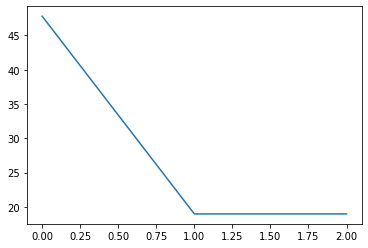

In [359]:
centroids = train(samples)


In [360]:
centroids

array([[19.63718221, 20.26722149, 22.45410456, 19.50620131],
       [80.653565  , 80.69619068, 80.26211241, 80.32702727]])

In [361]:
def get_class(sample, clusters_centers):
    return np.argmin(((clusters_centers - sample) ** 2).sum(1))

In [362]:
get_class(samples[1],centroids)

0

In [363]:
get_class(samples[7],centroids)

0

In [364]:
get_class(samples[11],centroids)

0

In [365]:
samples = np.array([
    *[[random.normalvariate(20,10) for __ in range(SCORE_NUM)] for _ in range(int(STUDENTS_NUM))],
    *[[random.normalvariate(80,10) for __ in range(SCORE_NUM)] for _ in range(int(STUDENTS_NUM))]
    ]
    , dtype=float)

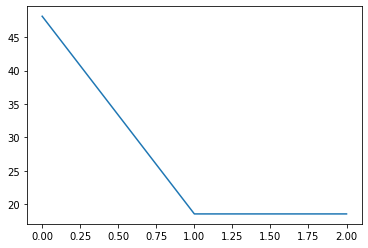

In [366]:
centroids = train(samples)



In [367]:
centroids


array([[19.88370905, 18.69016472, 18.91250153, 19.79574107],
       [80.7405162 , 79.27756412, 79.36122319, 79.05575391]])